Esse notebook destina-se a análise dos dados referentes as propostas legislativas no período de 1934 a 2021. As perguntas estabelecidas e as hipóteses a serem comprovadas foram:

1. Houve aumento na quantidade anual de propostas legislativas cuja temática beneficia grupos historicamente marginalizados no período entre 1934 e 2021?
    - **Hipótese:** Sim, houve aumento na quantidade anual de propostas legislativas cuja temática beneficia grupos historicamente marginalizados.
2. Qual é o coeficiente de correlação entre a quantidade anual de propostas legislativas cuja temática beneficia grupos historicamente marginalizados e o percentual de mulheres eleitas para o cargo de deputada federal entre os anos de 1995 e 2019?
    - **Hipótese:** Fraco

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## 1. Houve aumento na quantidade anual de propostas legislativas cuja temática beneficia grupos historicamente marginalizados no período entre 1934 e 2021?
**Hipótese:** Sim, houve aumento na quantidade anual de propostas legislativas cuja temática beneficia grupos historicamente marginalizados.

In [4]:
proposicoes = pd.read_csv('../dados/proposicoes_legislativas_limpas_vocabulario.csv')

In [8]:
proposicoes.head()

,id,siglaTipo,ano,codTipo,descricaoTipo,ementa,ementaDetalhada,keywords,temas
0,168293,PDC,1965,135,Projeto de Decreto Legislativo,MANTEM DECISÃO DENEGATORIA DO TRIBUNAL DE CONT...,NaN,"manutenção,decisão,tribunal,contas,união,tcu,d...",NaN
1,168297,PDC,1965,135,Projeto de Decreto Legislativo,MANTEM ATO DO TRIBUNAL DE CONTAS DA UNIÃO DE R...,NaN,"manutenção,ato,tribunal,contas,união,tcu,recus...",NaN
2,168300,PDC,1965,135,Projeto de Decreto Legislativo,MANTÉM DECISÃO DENEGATÓRIA DO TRIBUNAL DE CONT...,NaN,"manutenção,decisão,tribunal,contas,união,tcu,d...",NaN
3,168303,PDC,1965,135,Projeto de Decreto Legislativo,MANTÉM ATO DO TRIBUNAL DE CONTAS DA UNIÃO QUE ...,NaN,"manutenção,ato,tribunal,contas,união,tcu,negaç...",NaN
4,168307,PDC,1965,135,Projeto de Decreto Legislativo,MANTEM O ATO DO TRIBUNAL DE CONTAS DA UNIÃO QU...,NaN,"manutenção,ato,tribunal,contas,união,tcu,deneg...",NaN


Agrupa por ano a quantidade de propostas legislativas referente a proteção de direitos de grupos historicamente marginalizados.

In [9]:
proposicoes_anuais = proposicoes[['ano', 'temas']].groupby(by=['ano']).count()

In [10]:
proposicoes_anuais.tail(10)

,temas
ano,
2012,91
2013,121
2014,99
2015,250
2016,135
2017,178
2018,123
2019,321
2020,280


Visualiza em um plano cartesiano

<AxesSubplot:xlabel='ano'>

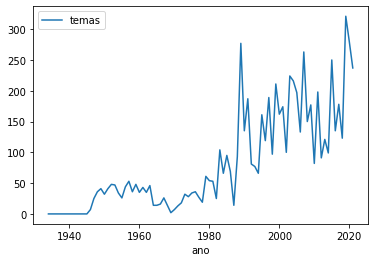

In [11]:
proposicoes_anuais.plot.line()

In [12]:
proposicoes_anuais = proposicoes_anuais.reset_index()
proposicoes_anuais.to_csv('../dados/proposicoes_anuais.csv')

In [13]:
print(f'''
Pergunta: Houve aumento na quantidade anual de propostas legislativas cuja temática beneficia grupos historicamente marginalizados no período entre 1934 e 2021? \n 
Resposta: Conforme observado no gráfico acima, apesar de pequenas variações, percebemos um crescimento consistente na quantidade de propostas legislativas com a temática analisada.
''')


Pergunta: Houve aumento na quantidade anual de propostas legislativas cuja temática beneficia grupos historicamente marginalizados no período entre 1934 e 2021? 
 
Resposta: Conforme observado no gráfico acima, apesar de pequenas variações, percebemos um crescimento consistente na quantidade de propostas legislativas com a temática analisada.



# CONFIRMAR RESPOSTA APÓS CONCLUSÃO DO VOCABULÁRIO

## 2. Qual é o coeficiente de correlação entre a quantidade anual de propostas legislativas cuja temática beneficia grupos historicamente marginalizados e o percentual de mulheres eleitas para o cargo de deputada federal entre os anos de 1995 e 2019?
**Hipótese:** Fraco

Importa dados das análises constantes no notebook [analise-candidaturas-eleitas](/analise-candidaturas-eleitas.csv)

In [14]:
analise_genero_1995_2007 = pd.read_csv('../dados/analise_genero_1995_2007.csv')
analise_genero_2007_2019 = pd.read_csv('../dados/analise_genero_2007_2019.csv')

Verifica se as colunas dos dataframes são identicas

In [15]:
analise_genero_1995_2007.columns == analise_genero_2007_2019.columns

array([ True,  True,  True])

Cria dataframe único

In [16]:
analise_genero_1995_2019 = pd.concat([analise_genero_1995_2007, analise_genero_2007_2019], ignore_index=True)

In [17]:
analise_genero_1995_2019

,Unnamed: 0,mulher,homem
0,1995,6.61,93.39
1,1999,6.07,93.93
2,2003,8.27,91.73
3,2007,8.05,91.95
4,2007,8.05,91.95
5,2011,8.94,91.06
6,2015,10.43,89.57
7,2019,14.60,85.40


In [18]:
analise_genero_1995_2019.rename(columns={'Unnamed: 0': 'ano'}, inplace=True)

In [19]:
analise_genero_1995_2019.drop(index=3, inplace=True)

In [20]:
analise_genero_1995_2019

,ano,mulher,homem
0,1995,6.61,93.39
1,1999,6.07,93.93
2,2003,8.27,91.73
4,2007,8.05,91.95
5,2011,8.94,91.06
6,2015,10.43,89.57
7,2019,14.60,85.40


In [21]:
anos = analise_genero_1995_2019['ano'].tolist()
anos.append(2021)
anos

[1995, 1999, 2003, 2007, 2011, 2015, 2019, 2021]

Insere período completo de cada legislatura, levando em conta que proporcionalidade de gênero só é alterada a cada nova eleição.

In [22]:
for ano in anos:
    mulher_percentual = analise_genero_1995_2019['mulher'][analise_genero_1995_2019['ano'] == ano].item()
    homem_percentual = analise_genero_1995_2019['homem'][analise_genero_1995_2019['ano'] == ano].item()
    if ano < 2021:
        dados = pd.DataFrame(data={
            'ano': [ano+1, ano+2, ano+3], 
            'mulher': [mulher_percentual, mulher_percentual, mulher_percentual], 
            'homem': [homem_percentual, homem_percentual, homem_percentual]}
                            )
        analise_genero_1995_2019 = pd.concat([analise_genero_1995_2019, dados])

In [23]:
analise_genero_1995_2019.sort_values(by=['ano'], inplace=True)

In [24]:
analise_genero_1995_2019.reset_index(drop=True, inplace=True)

In [25]:
analise_genero_1995_2019.tail()

,ano,mulher,homem
23,2018,10.43,89.57
24,2019,14.60,85.40
25,2020,14.60,85.40
26,2021,14.60,85.40
27,2022,14.60,85.40


In [26]:
analise_genero_1995_2019.drop(index=27, inplace=True)    

Insere total anual de propostas legislativas cuja temática beneficia grupos historicamente marginalizados.

In [27]:
def insere_qnt_propostas(ano_candidaturas_eleitas):
    for ano, qnt_tema in zip(proposicoes_anuais['ano'], proposicoes_anuais['temas']):
        if ano == ano_candidaturas_eleitas:
            return qnt_tema

In [28]:
analise_genero_1995_2019['qnt_temas'] = analise_genero_1995_2019['ano'].apply(insere_qnt_propostas)

In [29]:
analise_genero_1995_2019.head(10)

,ano,mulher,homem,qnt_temas
0,1995,6.61,93.39,161
1,1996,6.61,93.39,119
2,1997,6.61,93.39,189
3,1998,6.61,93.39,97
4,1999,6.07,93.93,211
5,2000,6.07,93.93,162
6,2001,6.07,93.93,174
7,2002,6.07,93.93,100
8,2003,8.27,91.73,224
9,2004,8.27,91.73,216


Criar matriz de correlação

In [30]:
correlacao = analise_genero_1995_2019[['mulher', 'homem', 'qnt_temas']].corr(method='pearson')

In [31]:
coeficiente_correlacao_mulher_qnt_temas = round(correlacao['mulher']['qnt_temas'],2)

In [32]:
correlacao_matriz_triangular = np.triu(np.ones_like(correlacao))

<AxesSubplot:>

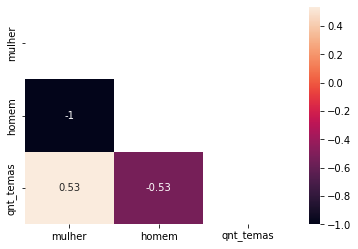

In [33]:
sns.heatmap(correlacao, annot=True, mask=correlacao_matriz_triangular)

In [34]:
correlacao.to_csv('../dados/coeficiente_correlacao_mulher_qnt_temas.csv', index=False)

In [35]:
print(f'''Qual é o coeficiente de correlação entre a quantidade anual de propostas legislativas cuja temática beneficia grupos historicamente marginalizados e o percentual de mulheres eleitas para o cargo de deputada federal entre os anos de 1995 e 2019?\n 
- Conforme observado na matriz de correlação acima, este coeficiente de correlação de Pearson é {coeficiente_correlacao_mulher_qnt_temas}, o que caracteriza uma FORTE(????????) correlação  entre os itens analisados.
''')

Qual é o coeficiente de correlação entre a quantidade anual de propostas legislativas cuja temática beneficia grupos historicamente marginalizados e o percentual de mulheres eleitas para o cargo de deputada federal entre os anos de 1995 e 2019?
 
- Conforme observado na matriz de correlação acima, este coeficiente de correlação de Pearson é 0.53, o que caracteriza uma FORTE(????????) correlação  entre os itens analisados.



# CONFIRMAR RESPOSTA APÓS CONCLUSÃO DO VOCABULÁRIO